In [ ]:
# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first five records
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [17]:
# TODO: Total number of records
n_records = data.income.count()

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data.income==">50K"].income.count()

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data.income=="<=50K"].income.count()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100.0 * n_greater_50k/n_records

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

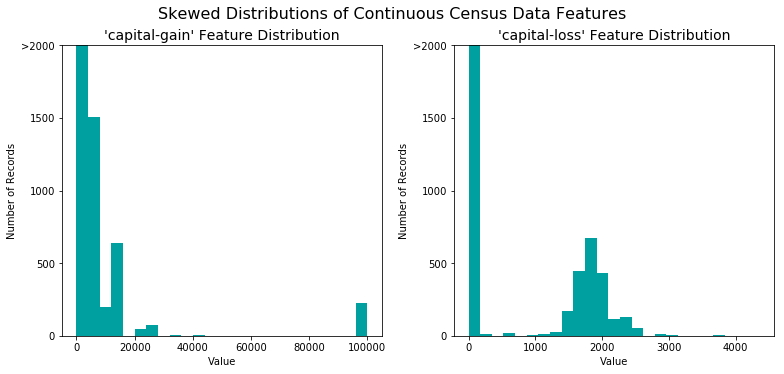

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

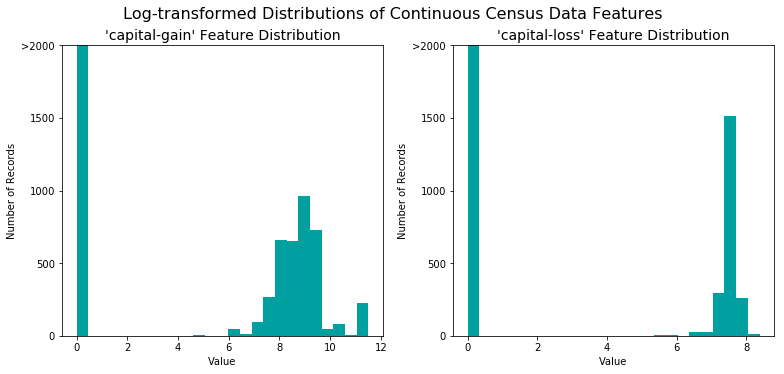

In [19]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [34]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [21]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
def nEnc(x):
    if x =='>50K': return 1 
    else: return 0
income = income_raw.apply(nEnc)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [27]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [24]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = float(np.sum(income))
FP = float(income.count())
TN=0.0
FN=0.0
beta = 0.5

accuracy = (TP + TN)/(FP+FN+TP+TN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
fscore =  (1.0 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.1986, F-score: 0.2365]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

GaussianNB trained on 36177 samples.
DecisionTreeClassifier trained on 36177 samples.
RandomForestClassifier trained on 36177 samples.
LinearSVC trained on 36177 samples.
KNeighborsClassifier trained on 36177 samples.
SGDClassifier trained on 36177 samples.
LogisticRegression trained on 36177 samples.
BaggingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 36177 samples.
SVC trained on 36177 samples.
[['GaussianNB', 'DecisionTree', 'RandomForest', 'LinearSVC'], ['KNeighbors', 'SGD', 'LogisticRegression', 'Bagging'], ['AdaBoost', 'GradientBoosting', 'SVC']]
[[0.42089895957560558, 0.62793914246196403, 0.68174992491740927, 0.68556430446194216], [0.63916413224762081, 0.66654131804080097, 0.68316522824165538, 0.63395092638958439], [0.64867552662507899, 0.7395338561802719, 0.67447717069966051]]
[[0.041563987731933594, 0.22470712661743164, 0.2350020408630371, 0.5071489810943604], [0.3557770252227783, 0.06155085563659668, 0

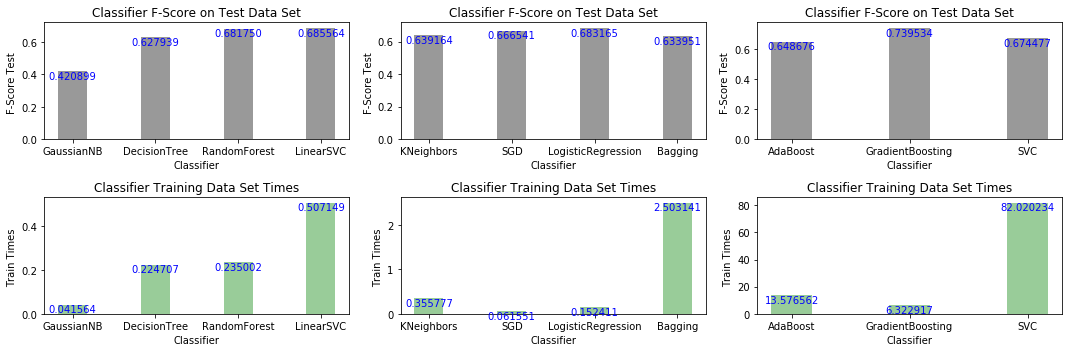

In [15]:
#This (optional) code cell generates bar chart plots of f-scores and elapsed time for training datasets
#It aims to guide the selection of three classifiers to be discussed
#*** makes use of train_predict function defined in cell In [10]
#Juan E. Rolon

import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Instantiate classifier objects and stored them in a list for later access

gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
bags = BaggingClassifier(KNeighborsClassifier(), random_state=10, n_jobs=6)
bdt = AdaBoostClassifier(DecisionTreeClassifier(random_state=20), algorithm="SAMME")
rfc = RandomForestClassifier(random_state=90, n_jobs=6)
gdb = GradientBoostingClassifier(random_state=30)
knn = KNeighborsClassifier(n_jobs=6)
stgd = SGDClassifier(random_state=40, n_jobs=6)
lsvc = LinearSVC(random_state=80)
svc = SVC(random_state=60)
lreg = LogisticRegression(random_state=50)

clf_list = [[gnb, dt, rfc, lsvc], [knn, stgd, lreg, bags], [bdt, gdb, svc]]

#Create lists to store selected benchmarking results
clf_lscores = []
clf_ltrain_times = []
clf_lnames = []

#Train all classifiers on training data and make predictions on test data
#Store desired benchmarking results
for j in range(len(clf_list)):
    temp_scores = []
    temp_times = []
    temp_names = []
    for i in range(len(clf_list[j])):
        clf_results = train_predict(clf_list[j][i], len(y_train), X_train, y_train, X_test, y_test)
        temp_scores.append(clf_results['f_test'])
        temp_times.append(clf_results['train_time'])
        temp_names.append(clf_results['clf_name'].replace('Classifier', ''))
    clf_lscores.append(temp_scores)
    clf_ltrain_times.append(temp_times)
    clf_lnames.append(temp_names)

print clf_lnames
print clf_lscores
print clf_ltrain_times

#Generate bar chart plots using selected benchmarking results

plt.figure(1, figsize=(15, 5))

for j in range(len(clf_lscores)):

    n_groups = len(clf_lscores[j])
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.4
    impdata1 = clf_lscores[j]
    impdata2 = clf_ltrain_times[j]
    plt.subplot(2, 3, j+1)
    plt.xlabel('Classifier')
    plt.ylabel('F-Score Test ')
    plt.title('Classifier F-Score on Test Data Set')
    plt.xticks(index, clf_lnames[j])    
    bar1 = plt.bar(index, impdata1, bar_width, alpha=opacity, color='k')
    for rect in bar1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color='b')
    plt.subplot(2, 3, j+4)
    plt.xlabel('Classifier')
    plt.ylabel('Train Times ')
    plt.title('Classifier Training Data Set Times')
    plt.xticks(index, clf_lnames[j])
    bar2 = plt.bar(index, impdata2, bar_width, alpha=opacity, color='g')

    for rect in bar2:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color='b')
    
plt.tight_layout()
plt.show()

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: ** To aid in the selection of three models I generated a collection of bar graphs indicating the resulting f-score on the test set as well as the training times for each classifier. See figure above. I chose three classifiers yielding the highest f-score and reasonably short training times. Amongst the slow algorithms (righ-panel) I chose Gradient Boosting as it yielded the highest f-score of all classifiers tested; among the intermediate algorithms (middle panel) I chose logistic regression which runs fast and yields the best score in that group. In the left panel, I chose linear SVC as it yielded the hightes f-score in that group; Random Forest could have been a good choice as well.


** 1. Gradient Boosting:**

*1.1 Application:

- It is a popular approach to ensemble learning for applications in which real-time performance is required, such as face detection systems capable of detecting faces in real-time with both high detection rate and very low false positive rates. 

*1.2 Strengths: 

- The goal of gradient boosting is to boost the performance of a linear combination of weak learning algorithms. 

- A gradient boost classifier learns from the mistakes of the previous weak learners in the ensemble and only selects those features known to improve the predictive power of the model.

- It is a generalization of the AdaBoost algorithm. It uses gradients (gradient descent) instead of re-weighting to boost the shortcomings of misclassified labels.

- It can be used for regression, classification and raking.

- It is able to handle a variety of loss functions.

- Execution times can be handled  appropriately and improved in proportion to available computational resources.

*1.3 Weaknesses:

- Making weak classifiers too complex can lead to overfitting.

- Making weak classifiers too weak can lead to low margins, which can also result in overfitting.

- Boosting very complex underlying learner algorithms that intrinsically overfit the model will lead to an overfitted results; oftentimes this also can lead to convergence issues.

*1.4 Appropriateness:

- Boosting can be really successful in boosting algorithms developed for binary classification. As discussed in the data preprocessing section, the training dataset contains imbalanced classes and constitutes essentially a binary classification problem.

- Gradient boosting can handle class imbalance by constructing successive training sets based on incorrectly classified examples.

- As we are dealing with imbalanced data, we need to be cautiuos and monitor whether the algorithm predicts all the cases into majority classes without loss of overall accuracy.

** 2.- Logistic Regression: **

*2.1 Application:

It is perhaps arguably the most popular method for binary classification problems. A common application is in the field of financial risk analysis where LR can be applied to predict the risk of customer defaulting on their debts scheduled payments or the probability of a banking transaction to be fraudulent.

*2.2 Strengths:

- Easy to implement and very efficient to train.
- Serves as a good benchmark before exploring more complex algorithms.
- Imbalances in the training datasets affect only the estimate of the model intercept. 

*2.3 Weaknesses:

- As is, it is restricted to linear problems.
- Hypothesis space is limited. 
- Imbalances in the training dataset can results in the skewing of the predicted probabilities.

*2.4 Appropriateness:

- Our problem can be casted as binary classification problem and as such, logistic regression can work as a good  prototype to benchmark the model. Potential imbalances in the data set may be alleviated using cross validation and designing appropriate thresholding criterions to make predictions.


** 3.- Support Vector Machines: **

*3.1 Application:

Support vector machines are widely applied in both classification and regression problems. In bioinformatics, these methods are applied in protein and gene expression classification. Likewise, they are applied in clinical biostatistics in the design of disease (e.g. cancer) detection protocols.

*3.2 Strengths:

- In particular, linear support vector machines are naturally fitted to solve binary classification problems as the classifier is a separating hyperplane.

- Capable of handling very large feature spaces, i.e. complexity is weakly dependent on the dimensionality of feature space.

- Model simplification is facilitated by feature selection, which can result in shorter training times and better convergence.

- Overfitting can be reasonably controlled by the soft margin approach

*3.3 Weaknesses:

- Better suited for binary classification; multiclass classification requires reducing the multiclass problem into multiple binary classification problems.

- Requires full labeling of input data; parameters of resulting model are sometimes difficult to interpret.

- Susceptible to noise, i.e. uncontrolled mislabeled examples can dramatically decrease performance.

*3.4 Appropriateness:

- For our particular binary classification problem, the linear SVM is capable of finding the optimal separating hyperplane for imbalanced classes. With default settings, in addition to yielding a better f-score, the Linear SVM is orders of magnitude faster than SVM as seen in our bar charts above.


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [13]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
# DONE
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
   
    start = time() # Get start time
    learner = learner = learner.fit(X_train[:],y_train[:])
    end = time() # Get end time
    
    # TODO: Calculate the training time
   
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction timeE
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:sample_size], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    
    # Added two additional key:values << Juan E. Rolon
    # -------------------------------------------------
    results['clf_name'] = learner.__class__.__name__
    results['samp_size'] = sample_size
    #-------------------------------------------------
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


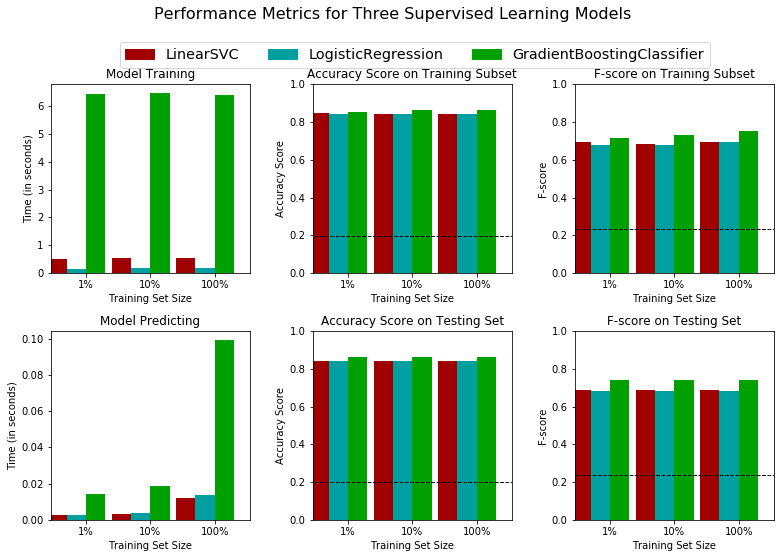

In [25]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


# TODO: Initialize the three models

gdb = GradientBoostingClassifier(random_state=30)
lsvc = LinearSVC(random_state=80)
lreg = LogisticRegression(random_state=50)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = int(len(y_train))
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [gdb, lsvc, lreg]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: ** 
In my opinion, GradientBoosting is the most appropriate model for the task at hand. There are several factors to consider in chosing the best model. 

Firstly, we want our model to precisely predict individuals that make more than 50,000 dlls. from a population sample where most of the individuals make less than this amount. In other words, we want to achieve the best performance metrics for our model, taking into account potential imbalances in the dataset. These imbalances result from the skewing of these two class distributions. Based on this, is not enough to weigh only on classification accuracy, but also on a performace metric such as the f-beta score. It is clear from the bar plots above that GradientBoosting achieves both the highest accuracy and f-beta score among the classifiers when testing the model on the entire dataset. 

Secondly, our model should rely on an algorithm that deals appropriately with potential data imbalances. Indeed, one of the strenghts of GradientBoosting is its ability to handle class imbalances by constructing successive training sets based on incorrectly classified examples (identifying someone that does not make more than 50,000 dlls. as someone who does).

Lastly, we should look for a model whose computational overhead or runtime scales-up reasonably with the size of the training dataset, without compromising the performance metrics. Although gradient boosting seems to be 1 to 4 orders of magnitude slower than LinearSVM and Logistic Regression, it yields an appreciable higher f-beta score. We believe that runtime can be handled appropiately by our in-house HPC cluster or by purchasing on-demand access to services such as Amazon HPC or Amazon ML, if needed.



### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** Gradient boosting belongs to the class of machine learning algorithms called boosting ensemble methods. The idea of these methods is to combine several weak learners (ensemble of predictors or classifier algorithms) to form a strong learner during the training process. By weak learner we meant to say an algorithm whose performance metrics are poor, i.e. it does slightly better than random guessing when classifying examples. In particular, gradient boosting works by sequentially adding new predictors to the ensemble, each correcting the predictions of its predecessor. However, instead of tweaking the example instances weights at every iteration, gradient boosting fits the new predictor to the residual errors made by the previous predictor; here the residual errors are interpreted as the absolute value of the difference between the predicted labels and the actual values of the labels provided in the training set.

We can illustrate the entire process as follows. We initially train a non-optimized classifier that we assume to be weak. This classifier will output a set of classification predictions on the given examples on the training dataset. Based on the residual errors made by the first predictor, we train a second classifier of the same type; and again, based on the residual errors made by this second classifier on making a new set of prediction, we train a third classifier and so on. The residual errors are proportional to the rate of change or gradient of some "loss function", which basically represents the price paid for the inaccuracy of predictions. Therefore, the idea is to minimize this loss, and gradient boosting does this minimization by "moving" in sample or feature space in the opposite direction of the gradient, hence the name of the method.

References:

1. Zhi-Hua Zhou, Ensemble Methods Foundations and Algorithms, CRC Press (2012).

2. Gradient Boosting. https://en.wikipedia.org/wiki/Gradient_boosting


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [29]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=30)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = parameters = {'max_depth': [4,6, 8, 10], 'n_estimators': [100, 200,300], \
                           'max_features':['sqrt', 'log2'],'loss':['deviance','exponential']}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8677
Final F-score on the testing data: 0.7436


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.1986          |   0.8630          |   0.8677        |
| F-score        |     0.2365          |   0.7395          |   0.7436        |


**Answer: ** It is evident that optimized gradient boosting performs much better than the benchmark predictor and slighly better than its own non-optimized verson.  

The accuracy of the optimized model is 336.9% higher than the benchmark predictor and 0.55% higher than the unoptimized model.

The f-score of the optimized model is 214.4% higher than the benchmakr predictor and 0.55% higher than the unoptimized model.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

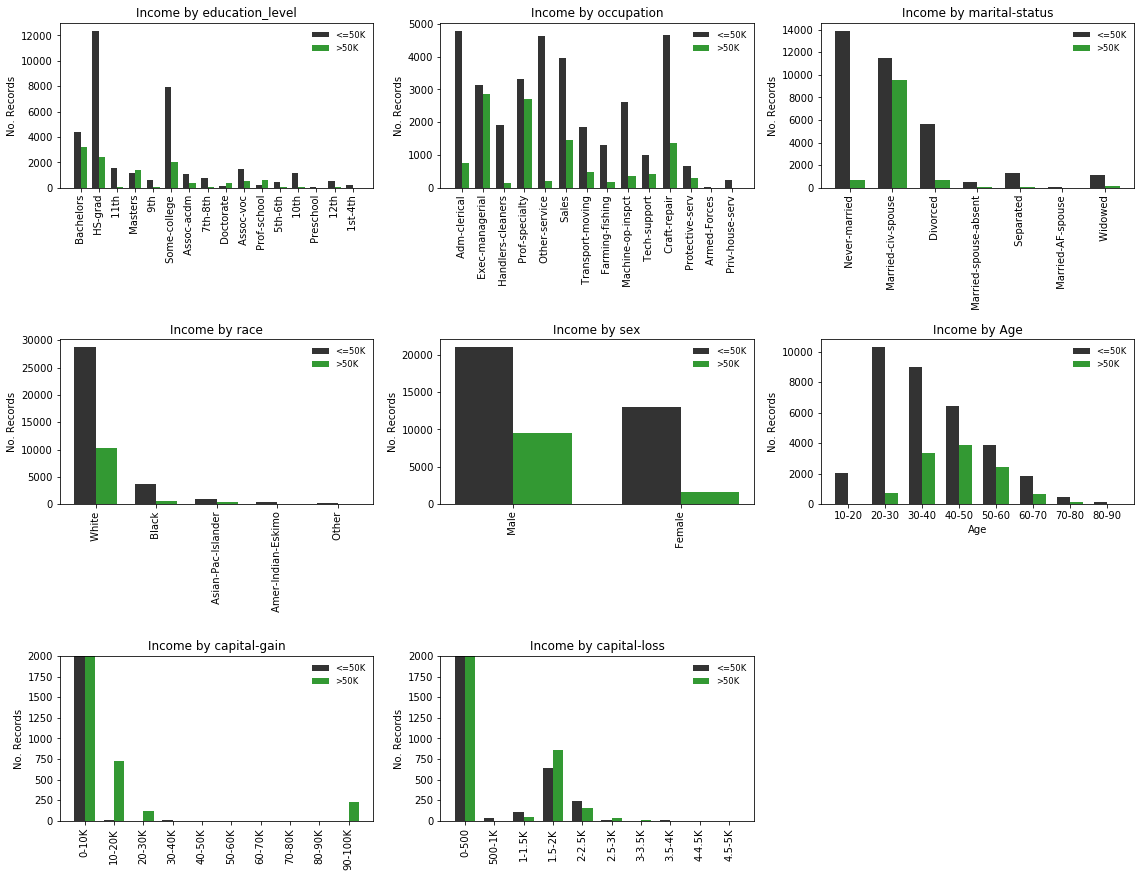

In [4]:
#I generated this optional code cell to guide the 
#reviewer in following-up with my answer to question 6 below.
#It generates bar plots indicating no. records per 
#selected raw feature. Bars are split by the income threshold $50K
#Juan E. Rolon

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#create figure
plt.figure(1, figsize=(16, 16))
plot_num = 1
nrows = 4
ncols = 3
for feat_choice in sub_features:
    groups = features_raw[feat_choice].unique()
    gelems = len(groups)
    less_than_50 = [0] * gelems
    more_than_50 = [0] * gelems
    for ocn in range(len(groups)):
        for row in range(len(features_raw)):
            if features_raw[feat_choice][row].strip() == groups[ocn].strip() and income_raw[row].strip() == '>50K':
                more_than_50[ocn] += 1
            elif features_raw[feat_choice][row].strip() == groups[ocn].strip() and income_raw[row].strip() == '<=50K':
                less_than_50[ocn] += 1

    # create subplots for 'education_level', 'occupation', 'marital-status', 'race', 'sex'
    plt.subplot(nrows, ncols, plot_num)
    index = np.arange(gelems)
    bar_width = 0.35
    opacity = 0.8
    rects1 = plt.bar(index, less_than_50, bar_width, alpha=opacity, color='k', label='<=50K')
    rects2 = plt.bar(index + bar_width, more_than_50, bar_width, alpha=opacity, color='g', label='>50K')
    plt.ylabel('No. Records')
    plt.title('Income by {}'.format(feat_choice))
    plt.xticks(index + bar_width / 2.0, groups, rotation='vertical')
    plt.legend(frameon=False, loc='upper right', fontsize='small')
    plot_num += 1

# create extra subplot for 'age'

age_groups = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
n_groups_age = len(age_groups)
less_than_50_age = [0] * n_groups_age
more_than_50_age = [0] * n_groups_age
d_age = 10
offset = 0
for agn in range(len(age_groups)):
    if agn == len(age_groups) - 1: offset = 1
    for row in range(len(features_raw)):
        if d_age <= features_raw['age'][row] < d_age + 10 + offset and income_raw[row].strip() == '>50K':
            more_than_50_age[agn] += 1
        elif d_age <= features_raw['age'][row] < d_age + 10 + offset and income_raw[row].strip() == '<=50K':
            less_than_50_age[agn] += 1
    d_age += 10

plt.subplot(nrows, ncols, plot_num)
index = np.arange(n_groups_age)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, less_than_50_age, bar_width, alpha=opacity, color='k', label='<=50K')
rects2 = plt.bar(index + bar_width, more_than_50_age, bar_width, alpha=opacity, color='g', label='>50K')
plt.xlabel('Age')
plt.ylabel('No. Records')
plt.title('Income by Age')
plt.xticks(index + bar_width / 2.0, age_groups)
plt.legend(frameon=False, loc='upper right', fontsize='small')

# create extra subplots for 'capital-gain', 'capital-loss'

cap_gain_groups = ['0-10K', '10-20K', '20-30K', '30-40K', '40-50K', '50-60K', '60-70K', '70-80K', '80-90K', '90-100K']
cap_loss_groups = ['0-500', '500-1K', '1-1.5K', '1.5-2K', '2-2.5K', '2.5-3K', '3-3.5K', '3.5-4K','4-4.5K', '4.5-5K']
gr_set = [cap_gain_groups, cap_loss_groups]
cap_feat = ['capital-gain', 'capital-loss']

for m, feat in enumerate(cap_feat):
    n_groups_cap = len(gr_set[m])
    less_than_50 = [0] * n_groups_cap
    more_than_50 = [0] * n_groups_cap
    d_cap = 0
    steps = [10000, 500]
    offset = 0
    for agn in range(len(gr_set[m])):
        if agn == len(gr_set[m]) - 1: offset = 100
        for row in range(len(features_raw)):
            if d_cap <= features_raw[feat][row] < d_cap + steps[m] + offset and income_raw[row].strip() == '>50K':
                more_than_50[agn] += 1
            elif d_cap <= features_raw[feat][row] < d_cap + steps[m] + offset and income_raw[row].strip() == '<=50K':
                less_than_50[agn] += 1
        d_cap += steps[m]

    # create subplots
    plt.subplot(nrows, ncols, plot_num + 1)
    index = np.arange(n_groups_cap)
    bar_width = 0.35
    opacity = 0.8
    rects1 = plt.bar(index, less_than_50, bar_width, alpha=opacity, color='k', label='<=50K')
    rects2 = plt.bar(index + bar_width, more_than_50, bar_width, alpha=opacity, color='g', label='>50K')
    plt.title('Income by {}'.format(feat))
    plt.ylabel('No. Records')
    plt.xlabel(feat)
    plt.ylim((0, 2000))
    plt.xticks(index + bar_width / 2.0, gr_set[m], rotation='vertical')
    plt.legend(frameon=False, loc='upper right', fontsize='small')
    plot_num += 1

plt.tight_layout()
plt.show()

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:** To answer this question accurately we need to apply feature selection engineering methods. However, we may attempt first to gain insight about the features that could be informative and discriminating and/or those that could provide the highest information gain, say using a "rule of thumb" or heuristic criterion. 

First, we can remove subsets of features from the training dataset and observe whether their removal maintains or improves our predictive performance metric. Features that don't affect performance metrics according to an established criterion or tolerance will be deemed irrelevant. Features that imply some form or redundancy would be removed accordingly as well. 

Second, we can try to estimate the purity of the feature or sufeatures that split into the classes of interest. Let us take a look at the subplots given above, each representing a selected feature, e.g education, occupation, etc. For categorical features we identify subfeatures representing a unique value of the parent feature and which splits the data classes, '<=50K' (black color) and '>50K' (green color); for continuous data each subfeature represents an interval and each interval splits the data in the same corresponding classes.

Intution from visual inspection ("rule of thumb"):

When targeting a specific feature, we aim to identify the subfeatures with the highest purity, i.e. a clear separation or discrimination between two classes of interest; preferentially in our case, observing a higher proportion of individuals earning '>50K' in some of the subfeatures, i.e taller green bars somewhere in the attribute distribution.

A crude measure of this is the following ratio: R =(No. '>50K')/(No. '<=50K') > threshold >= 0.5 (50%)
or equivalently with largest group percentage: GP = (No. '>50K')/((No. '<=50K') + (No. '<=50K')). 

In addition, these numbers should be representative of the total number of individuals earning '>50K'
GT = (No. '>50K')/(Total No. '50K').  Here (Total No. '50K') = 11,208 
So we are also looking for MAXIMAL values of GT when possible

** 1. Capital loss:**
This feature contains 3 subfeatures (capital gain amounts of 10-20K, 20-30K and 90-100K) with majortiy '>50K' class and clearly discriminated from the rest of the subfeatures. Among all features, capital gain fulfills all of our simplified feature importance criteria.

** 2. Capital gain:**
This feature contains 2 subfeatures (capital loss amounts of 1.5-2K, 2.5-3K) with majortiy '>50K' class and 1 subfeature (2-2.5K) with R > 50%. These attribute groups are clearly discriminated from the rest of the subfeatures. Capital loss fulfills all of our simplified feature importance criteria.

** 3. Education Level:**
It contains subfeatures "Masters", "Doctorate" and "Prof. School" with majortiy '>50K' class, and "Bachelors", with a high percentage of ">50K" earners in that group R > 0.5.  Althought these groups discriminate between the two income classes, the '>50K' (green) disbribution spreads a bit more among the rest of the groups in comparison to capital gain and loss. 

** 4. Marital Status:**
Contains the subfeature "Married-civ-Spouse" that is clearly discriminated from the rest of attribute groups, and which contains a significant proportion of '>50K' earners, R >0.5.

** 5. Age:**
The class distribution appears to be the envelope of a normal distribution, which is good for expectation values in relation to '>50K' class. Near the center we have subfeatures corresponding to age groups 40-50, 50-60 with a significant proportion of '>50K', R >0.5.

The rest of the features do not fulfill our "rule of thumb" criteria except for "Occupation", which contains a several ">50K" groups wiht R>0.5, but no '>50K' majority groups. In addition, 'occupation' seems to be correlated or dependent on the education feature (possibly redundant).

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

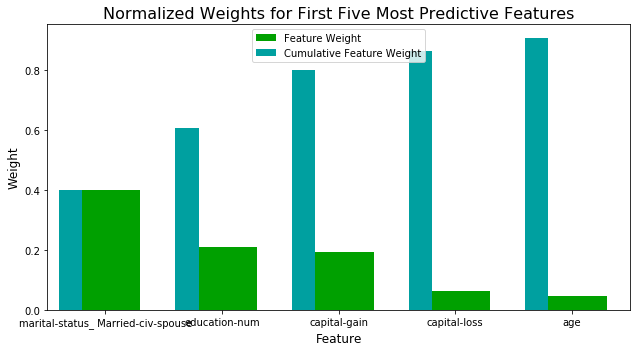

In [11]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(n_estimators=10,random_state=30,max_depth=8)
model.fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [13]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8693
F-score on testing data: 0.7490

Final Model trained on reduced data
------
Accuracy on testing data: 0.8589
F-score on testing data: 0.7250


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.